# DOCTOR CONSULTATION FEES PROJECT

Submitted by:Sucharitha A M
             1829 batch

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Examining The Data

In [2]:
df = pd.read_excel('Final_Test.xlsx')
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

In [4]:
df.shape

(1987, 6)

Dataset contains 1987 rows and 6 columns

In [5]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [6]:
df.Miscellaneous_Info.unique()

array([nan, '70% 4 Feedback KK Nagar, Chennai',
       'General Dentistry Conservative Dentistry Cosmetic/ Aesthetic Dentistry',
       ..., '98% 240 Feedback Velachery, Chennai',
       'RCT - Root Canal Treatment Root Canal Treatment - Rotary Pyorrhoea Treatment',
       '1 Feedback Pallikaranai, Chennai ₹500'], dtype=object)

Target/dependent variables is discrete and categorial in nature


In [7]:
df.loc[df['Miscellaneous_Info']==" "]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info


In [8]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

Here Rating and Miscellaneous_Info will be have sum and remaining will be zero

In [9]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

# Making DataFrame for The  Nominal Data

In [10]:
df_visualization_nominal=df[["Rating","Place","Profile","Qualification","Experience"]].copy()

In [11]:
df_visualization_nominal.columns

Index(['Rating', 'Place', 'Profile', 'Qualification', 'Experience'], dtype='object')

Dataset contains visualization of nominal 5 columns

# Visualization of The Data

BAMS                                                                            153
BHMS                                                                            150
BDS                                                                             144
MBBS                                                                            107
MBBS, MD - Dermatology                                                           64
                                                                               ... 
BHMS, MD (HOM) - Paeditrics, Fellowship Course in Homoeopathic Dermatology        1
MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, FRCS - General Surgery      1
MBBS, FICA, MD - General Medicine                                                 1
BDS, MDS- Oral Pathology                                                          1
BDS, Diploma in Health Administration                                             1
Name: Qualification, Length: 630, dtype: int64


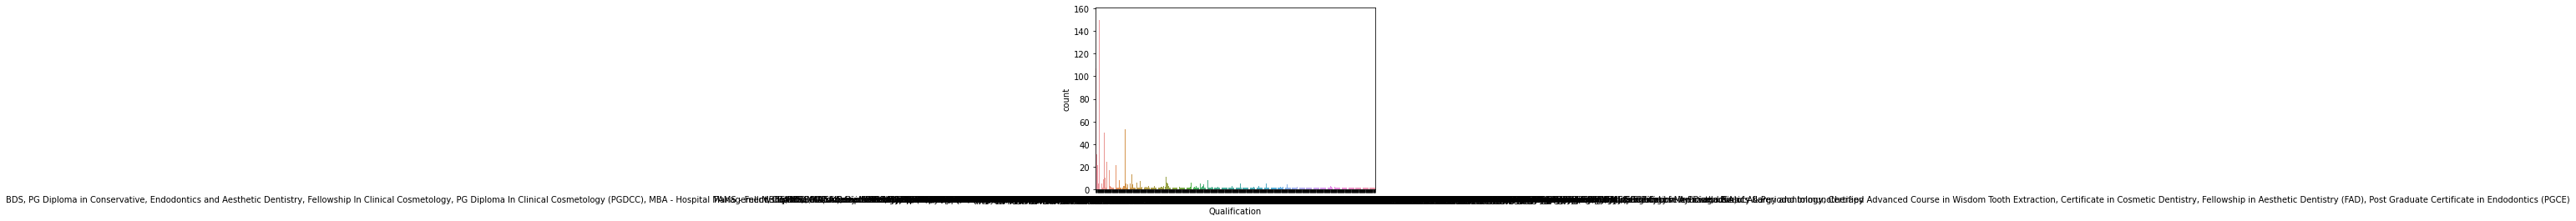

In [12]:
ax = sns.countplot(x="Qualification",data=df_visualization_nominal)
print(df_visualization_nominal["Qualification"].value_counts())

Here countplot contains the data visualization of nominal columns of qualification

10 years experience    110
8 years experience      98
9 years experience      96
19 years experience     92
7 years experience      89
11 years experience     86
13 years experience     83
14 years experience     81
12 years experience     79
17 years experience     72
18 years experience     70
6 years experience      62
15 years experience     57
16 years experience     51
5 years experience      50
23 years experience     49
20 years experience     48
21 years experience     48
29 years experience     46
4 years experience      44
22 years experience     37
24 years experience     34
3 years experience      33
25 years experience     33
26 years experience     32
0 years experience      31
28 years experience     29
27 years experience     27
34 years experience     27
36 years experience     27
31 years experience     26
38 years experience     23
30 years experience     18
44 years experience     16
32 years experience     16
40 years experience     15
37 years experience     14
3

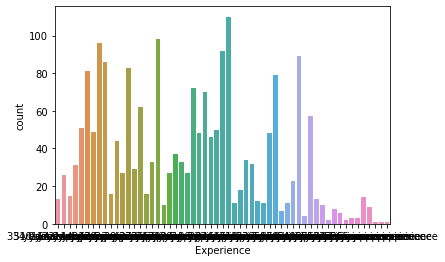

In [13]:
ax = sns.countplot(x="Experience",data=df_visualization_nominal)
print(df_visualization_nominal["Experience"].value_counts())

Here countplot contains the data visualization of nominal columns of experience

100%    223
98%     112
97%      84
99%      68
96%      65
94%      51
95%      47
93%      34
92%      29
90%      29
91%      26
88%      13
83%      11
89%      11
87%      11
82%       9
85%       8
71%       7
84%       7
80%       7
86%       6
73%       5
67%       5
70%       4
60%       4
76%       4
81%       3
55%       3
79%       2
69%       2
64%       2
78%       1
65%       1
77%       1
53%       1
52%       1
Name: Rating, dtype: int64


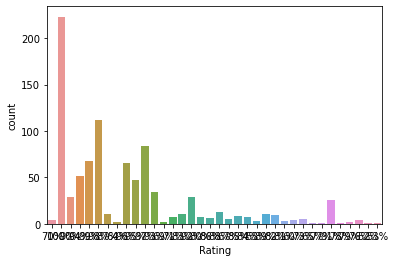

In [14]:
ax = sns.countplot(x="Rating",data=df_visualization_nominal)
print(df_visualization_nominal["Rating"].value_counts())

Here countplot contains the data visualization of nominal columns of Ratings

Mulund West, Mumbai            27
Andheri West, Mumbai           27
Dwarka, Delhi                  26
Whitefield, Bangalore          23
HSR Layout, Bangalore          22
                               ..
Vidyaranyapura, Bangalore       1
Mulanthuruthy, Ernakulam        1
Mehrauli, Delhi                 1
Kadubeesanahalli, Bangalore     1
Chintalmet, Hyderabad           1
Name: Place, Length: 592, dtype: int64


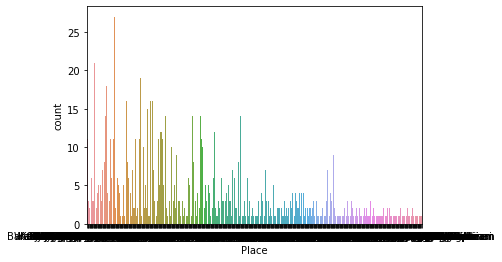

In [15]:
ax = sns.countplot(x="Place",data=df_visualization_nominal)
print(df_visualization_nominal["Place"].value_counts())

Here countplot contains the data visualization of nominal columns of place

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64


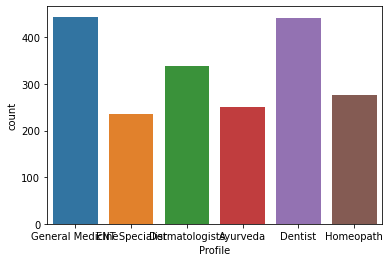

In [16]:
ax = sns.countplot(x="Profile",data=df_visualization_nominal)
print(df_visualization_nominal["Profile"].value_counts())

Here countplot contains the data visualization of nominal columns of profile

# Making DataFrame of The Ordinal Data

In [17]:
df_visualization_ordinal=df[["Qualification","Profile"]].copy()

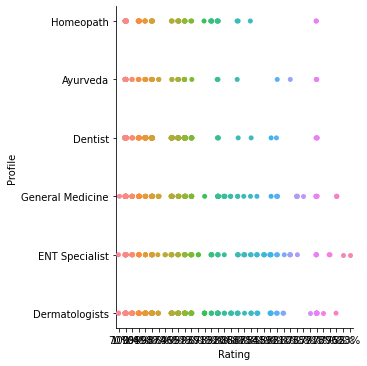

In [18]:
sns.catplot(x="Rating",y="Profile",data=df)

Here catplot contains the data visualization of ordinal data of qualification and profile,here x=rating and y=profile

In [19]:
df_visualization_ordinal=df[["Experience","Profile"]].copy()

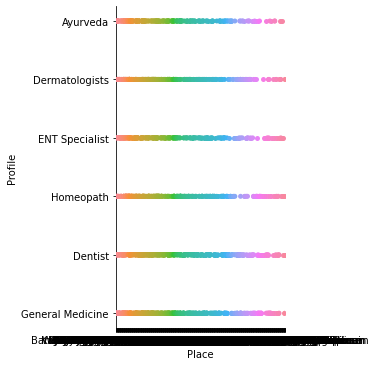

In [20]:
sns.catplot(x="Place",y="Profile",data=df)

Here catplot contains the data visualization of ordinal data of experience and profile,here x=place and y=profile

# checking the distribution of the continuous value of the object type columns

In [21]:
df_visualization_continuous=df[["Experience","Profile"]].copy()

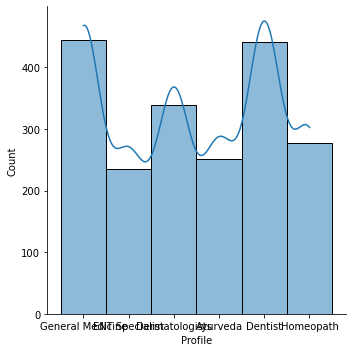

In [22]:
sns.displot(df_visualization_continuous['Profile'], kde=True)

Data is not normally distributed in this columns,because of viscous problem.

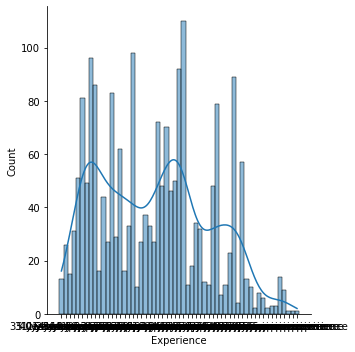

In [23]:
sns.displot(df_visualization_continuous['Experience'], kde=True)

Data is not normally distributed in this columns,because of viscous problem.

# Encoding of DataFrame

In [24]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Qualification']=LE.fit_transform(df['Qualification'])


In [25]:
df.Qualification.unique()

array([241, 340, 258,   6,  79,  78,  99, 542, 128,  51, 359, 247, 383,
       610, 349, 144, 519, 100, 115, 417, 616, 341, 483, 121, 183,  27,
       275, 155, 136, 285, 507, 235,  73, 409, 505, 581, 510,  44, 162,
       486, 363, 451, 126, 237, 480, 450, 198, 266, 345,  87, 303, 629,
       184,  93, 442, 428, 577, 255,   3, 494, 479,  97, 163, 553,  70,
       575, 384, 103, 280, 590, 140, 465, 602, 338, 288, 105, 552, 585,
       392, 319, 355,  92,  67,  90, 321,  50, 549, 293, 492, 214, 188,
       457, 329, 170,  46, 600,  23, 205, 594, 524, 281, 458, 210, 122,
       460, 551, 447,  60,  68, 330, 468, 588, 138, 264,  24, 272, 348,
       408, 548, 584, 405, 488, 296, 292, 337, 297, 228, 193, 173, 134,
       604, 108, 208, 475, 446, 347,  69, 232, 378, 316, 334,  77, 365,
       182, 146, 586, 490, 106, 568,  30,  45,  71, 352,  34, 227, 589,
       351, 178, 560, 304, 236, 432, 540, 564, 192, 543, 249, 124, 320,
        86, 448, 167, 147, 454, 131, 150, 240, 427, 513, 109,   

In [26]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,241,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,340,31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,258,40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,6,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,79,16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [27]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Experience']=LE.fit_transform(df['Experience'])


In [28]:
df.Experience.unique()

array([28, 24, 34,  0,  7,  5, 15, 56,  2, 38, 33, 27,  4, 20, 52, 25, 22,
       55, 37, 19, 14, 17, 29,  8, 12,  9, 21, 44, 10,  1, 11, 23, 16, 18,
       35, 40, 13,  3, 39, 26, 31, 54, 51,  6, 32, 36, 49, 43, 42, 47, 46,
       45, 30, 41, 48, 50, 53])

In [29]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,241,28,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,340,24,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,258,34,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,6,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,79,7,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [30]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Rating']=df['Rating'].replace({'NaN':0,'70%':1,'100%':1})


In [31]:
df.Rating.unique()

array([nan, 1, '90%', '94%', '99%', '98%', '87%', '64%', '96%', '95%',
       '97%', '93%', '69%', '71%', '83%', '92%', '80%', '86%', '88%',
       '67%', '85%', '84%', '55%', '89%', '82%', '81%', '60%', '73%',
       '65%', '77%', '91%', '78%', '79%', '76%', '52%', '53%'],
      dtype=object)

In [32]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,241,28,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,340,24,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,258,34,1,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,6,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,79,7,1,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


# Importing The Dataset

In [33]:
df = pd.read_excel('Final_Train.xlsx')
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [34]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Here Rating,place and miscellaneous_Info contains sum values and remaining values will be zero

In [35]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


<AxesSubplot:>

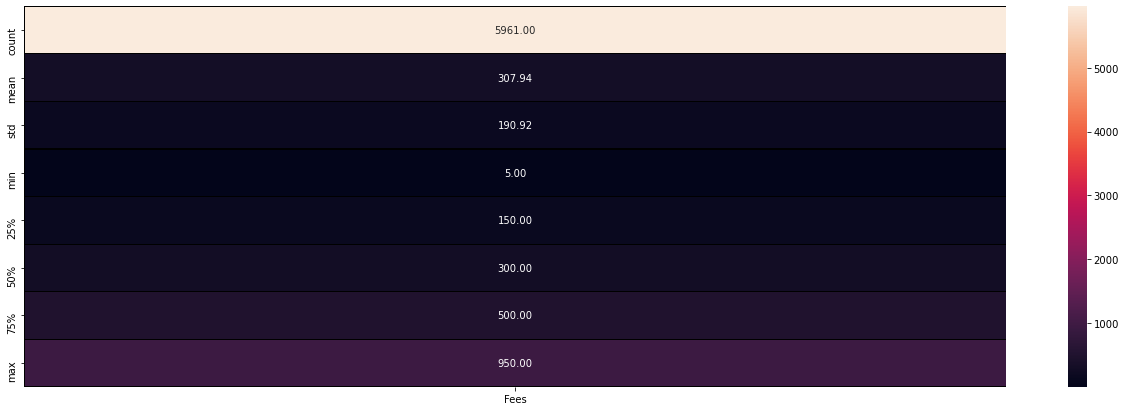

In [36]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")

Here heatmap containes the only one of describe value of dataset.

Light shades are higly describe

# Correlation of the columns with the target columns

In [37]:
df.corr()

,Fees
Fees,1.0


<AxesSubplot:>

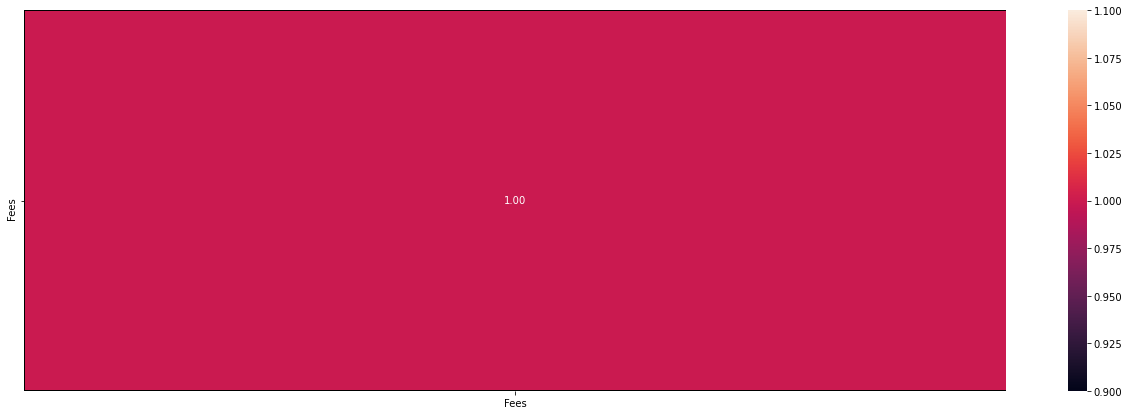

In [38]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")

Here heatmap containes the only one corresponding values of dataset.

Here Fees are higly corrolated

In [39]:
df.skew()

Fees    0.75187
dtype: float64

Here Dataset contains only one skew value

# Outlier Check

In [40]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

<AxesSubplot:>

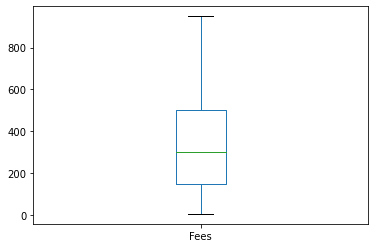

In [41]:
df['Fees'].plot.box()

Here all boxplots have no outside the viscous so we cant find here outliers easily.

In [42]:
df.shape

(5961, 7)

Here Dataset contains 5961 rows and 7 columns

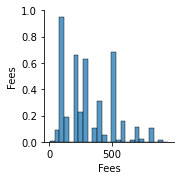

In [43]:
sns.pairplot(df)

Remove the missing values.

drop  the nagativitycorrelated columns.

remove the outliers.

# Considering The Outlier Removal

In [44]:
df.drop('Fees',axis=1,inplace=True)
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam"
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore"
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on..."
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai"


In [45]:
df.shape

(5961, 6)

Here Dataset contains 5961 rows and 6 columns

In [46]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

Here Dataset contains 6 columns

# Encoding Method

In [47]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Qualification']=LE.fit_transform(df['Qualification'])


In [48]:
df.Qualification.unique()

array([ 401,   73, 1135, ..., 1229,  349, 1273])

In [49]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,401,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam"
1,73,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore"
2,1135,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN
3,464,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on..."
4,10,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai"


In [50]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Place']=df['Place'].replace({'Place:0 or 1'})


In [51]:
df.Place.unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

In [52]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,401,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam"
1,73,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore"
2,1135,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN
3,464,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on..."
4,10,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai"


In [53]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Profile']=LE.fit_transform(df['Profile'])


In [54]:
df.Profile.unique()

array([5, 0, 3, 1, 4, 2])

In [55]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,401,24 years experience,100%,"Kakkanad, Ernakulam",5,"100% 16 Feedback Kakkanad, Ernakulam"
1,73,12 years experience,98%,"Whitefield, Bangalore",0,"98% 76 Feedback Whitefield, Bangalore"
2,1135,9 years experience,NaN,"Mathikere - BEL, Bangalore",3,NaN
3,464,12 years experience,NaN,"Bannerghatta Road, Bangalore",0,"Bannerghatta Road, Bangalore ₹250 Available on..."
4,10,20 years experience,100%,"Keelkattalai, Chennai",0,"100% 4 Feedback Keelkattalai, Chennai"


In [56]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Experience']=LE.fit_transform(df['Experience'])


In [57]:
df.Experience.unique()

array([16,  3, 63, 12, 62, 36,  1,  5, 15, 44, 61, 13, 10, 35, 24, 17,  7,
        6,  2, 14, 31, 55, 29,  4,  9, 40, 34, 43, 26,  0, 19, 23, 47, 56,
       18, 28, 27, 32, 25,  8, 20, 53, 33, 39, 38, 22, 30, 45, 21, 37, 49,
       60, 11, 46, 41, 42, 48, 51, 57, 54, 52, 50, 59, 58])

In [58]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,401,16,100%,"Kakkanad, Ernakulam",5,"100% 16 Feedback Kakkanad, Ernakulam"
1,73,3,98%,"Whitefield, Bangalore",0,"98% 76 Feedback Whitefield, Bangalore"
2,1135,63,NaN,"Mathikere - BEL, Bangalore",3,NaN
3,464,3,NaN,"Bannerghatta Road, Bangalore",0,"Bannerghatta Road, Bangalore ₹250 Available on..."
4,10,12,100%,"Keelkattalai, Chennai",0,"100% 4 Feedback Keelkattalai, Chennai"


In [59]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Rating']=df['Rating'].replace({0 and 1})


In [60]:
df.Rating.unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%'], dtype=object)

In [61]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,401,16,100%,"Kakkanad, Ernakulam",5,"100% 16 Feedback Kakkanad, Ernakulam"
1,73,3,98%,"Whitefield, Bangalore",0,"98% 76 Feedback Whitefield, Bangalore"
2,1135,63,NaN,"Mathikere - BEL, Bangalore",3,NaN
3,464,3,NaN,"Bannerghatta Road, Bangalore",0,"Bannerghatta Road, Bangalore ₹250 Available on..."
4,10,12,100%,"Keelkattalai, Chennai",0,"100% 4 Feedback Keelkattalai, Chennai"


In [62]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [63]:
df.drop(['Rating','Place','Miscellaneous_Info'],axis=1,inplace=True)

In [64]:
df.head()

,Qualification,Experience,Profile
0,401,16,5
1,73,3,0
2,1135,63,3
3,464,3,0
4,10,12,0


# Missing Value Handling Method

In [65]:
df.isnull().sum()

Qualification    0
Experience       0
Profile          0
dtype: int64

Dataset contains all sum values will be zero

In [66]:
df["Qualification"]=df["Qualification"].fillna(df["Qualification"].mean())
df["Profile"]=df["Profile"].fillna(df["Profile"].median())


In [67]:
df.skew()

Qualification    0.239720
Experience       0.823531
Profile          0.108803
dtype: float64

Dataset contains skew values

# Removing The Outliers

In [68]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.47330574, 0.33488263, 1.54301587],
       [1.26594438, 0.95584022, 1.47289258],
       [1.30046489, 1.91011789, 0.33665249],
       ...,
       [0.0020724 , 0.57267077, 0.93983418],
       [0.83648129, 0.81254231, 0.93983418],
       [0.85512557, 0.71701038, 0.86971089]])

Here Removing the otliers of df

In [69]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [70]:
df_new=df[(z<3).all(axis=1)]
df_new

,Qualification,Experience,Profile
0,401,16,5
1,73,3,0
2,1135,63,3
3,464,3,0
4,10,12,0
...,...,...,...
5956,1075,10,3
5957,596,26,4
5958,596,35,4
5959,943,6,4


Here new dataset contains 5961 rows and 3 columns

In [71]:
df.shape

(5961, 3)

Dataset contains 5961 rows and 3 columns

In [72]:
df_new.shape

(5961, 3)

New Dataset contains 5961 rows and 3 columns

# StandardScaler Method

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [74]:
scaledX

array([[-0.47330574, -0.33488263,  1.54301587],
       [-1.26594438, -0.95584022, -1.47289258],
       [ 1.30046489,  1.91011789,  0.33665249],
       ...,
       [-0.0020724 ,  0.57267077,  0.93983418],
       [ 0.83648129, -0.81254231,  0.93983418],
       [-0.85512557, -0.71701038, -0.86971089]])

Here standardscaler contains scaledX values

In [75]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [76]:
Y.explained_variance_ratio_

array([0.46474034, 0.33351649, 0.20174317])

In [77]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 46.47403412,  79.8256827 , 100.        ])

In [78]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 2


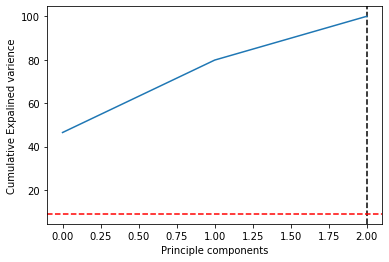

In [79]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

Here ylabel contains cumulative explained varience and xlabel contains principle components.

# Model Building

In [80]:
x_train = df.drop(['Profile'],axis=1)
y_train = df.Profile


In [81]:
x_train.head()

,Qualification,Experience
0,401,16
1,73,3
2,1135,63
3,464,3
4,10,12


Here x_train contains only qualification and experience

In [82]:
y_train.head()

0    5
1    0
2    3
3    0
4    0
Name: Profile, dtype: int32

y_train contains the name profile

In [83]:
x_train.shape

(5961, 2)

Here x_train contains 5961 rows and 2 columns

In [84]:
y_train.shape

(5961,)

Here y_train contains 5961 rows and zero columns

# Regressor Methods

In [85]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [86]:
x = df.drop(['Profile'],axis=1)
y = df["Profile"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.2)

In [87]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

0.4080029045051263
0.4495705069444311
0.4723677999834039
0.5151641496852164
0.49572180287166323
0.46728311532847977
0.537570266767286
0.5032240406517556
0.45489218229426265
0.44285102520087716
0.4160546356491086
0.4357847659559554
0.4915339372471545
0.4729031207531718
0.45272747552732184
0.4536217778470665
0.4919822422225948
0.4675368653431559
0.46282571200771094
0.44547682840896485
0.4746986672532387
0.47303162303876434
0.41156589152739476
0.4487608843318326
0.40825697339547784
0.3733075026482454
0.4784188406952177
0.4168812421216162
0.3998324686991688
0.4259512433137186
0.4764842329743746
0.5289363208415997
0.43642702740044026
0.4426172482475781
0.45403823173360763
0.3929169503291494
0.4868644071951104
0.49520532348416796
0.4088411169991609
0.5561505008176096
0.46888732188429993
0.4413889642889782
0.4469050126230985
0.46499937395873764
0.4923473902912649
0.35077406375074155
0.48163899947153377
0.47037553682821254
0.4564936593508142
0.44433318429747776
0.47090159166380396
0.4378389805

In [88]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)


DecisionTreeRegressor()

In [89]:
y_pred = regressor.predict(x_test)

In [90]:
y_pred

array([4., 5., 5., ..., 3., 2., 0.])

In [91]:
dt_accuracy = round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

99.34

The Test Accuracy of DecisionTreeClassifier is 99.34

In [92]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [93]:
y_pred = regressor.predict(x_test)
y_pred

array([4.  , 5.  , 5.  , ..., 3.  , 1.97, 0.  ])

In [94]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

98.72

The Test Accuracy of RandomForestRegressor is 98.17

In [95]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [96]:
y_pred = regressor.predict(x_test)
y_pred

array([3.06056545, 2.05289608, 2.25327735, ..., 3.22292233, 2.1261312 ,
       1.37184439])

In [97]:
lr_accuracy = round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

16.12

The Test Accuracy of LogisticRegression is 16.12

In [98]:
from sklearn.naive_bayes import GaussianNB
regressor = GaussianNB()
regressor.fit(x_train,y_train)

GaussianNB()

In [99]:
y_pred = regressor.predict(x_test)
y_pred

array([4, 1, 5, ..., 4, 1, 1])

In [100]:
nb_accuracy = round(regressor.score(x_train,y_train)*100,2)
nb_accuracy

49.64

The Test Accuracy of GaussianNB is 49.64

In [101]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train,y_train)

SVR()

In [102]:
y_pred = regressor.predict(x_test)
y_pred

array([ 2.91479146,  3.73126217,  4.27927277, ...,  3.07786621,
        4.30916402, -0.09593465])

In [103]:
svm_accuracy = round(regressor.score(x_train,y_train)*100,2)
svm_accuracy

55.55

The Test Accuracy of SVR is 55.55

In [104]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train,y_train)


KNeighborsRegressor()

In [105]:
y_pred = regressor.predict(x_test)
y_pred

array([4., 5., 5., ..., 3., 2., 0.])

In [106]:
knn_accuracy = round(regressor.score(x_train,y_train)*100,2)
knn_accuracy

94.01

The Test Accuracy of KNeighborsRegressor is 94.01

# Cross Validation Methods

In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9128006564596787


In [109]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9417442438590052


In [110]:
from sklearn.svm import SVR
regressor = SVR()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.5473041812694927


In [111]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.15382989281446524


In [112]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9055473796420305


In [113]:
from sklearn.naive_bayes import GaussianNB
regressor = GaussianNB()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.46183357054855784


# Hyperparametr Tunnings

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [116]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [117]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [118]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 12}

# Final Model

In [119]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

92.35742892891359


# Saving The Model

In [120]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

Here the saving model is finalmodel.pkl

# Prediction Method

In [121]:
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[4.         5.         5.         2.         2.         5.
 1.         2.         0.         2.         2.         0.
 2.         5.         0.         4.         2.         4.
 5.         5.         4.         4.         3.71428571 2.
 1.         0.         1.         3.         4.         0.
 0.         2.         2.         1.         1.         1.        ]
[4 5 5 2 2 5 1 2 0 2 2 0 2 5 0 4 2 4 5 5 4 4 4 2 1 0 1 3 4 0 0 2 2 1 1 1]


The train and test data is balanced most regressor methods hit the 92% accuracy with the datset.